# Perform Facial Recognition with Deep Learning in Keras Using CNN

DESCRIPTION

Problem Statement:
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0
Prerequisites:
Keras
Scikit Learn
Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:

i. Convolutional Layer
ii. Pooling Layer
iii. Fully Connected Layer

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

In [2]:
!pip install numpy

You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
# load the dataset
import numpy as np
import tensorflow as tf

In [4]:
trainX = np.load('trainX.npy', allow_pickle='TRUE')
trainY = np.load('trainY.npy', allow_pickle='TRUE')
testX = np.load('testX.npy', allow_pickle='TRUE')
testY = np.load('testY.npy', allow_pickle='TRUE')

In [5]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(240, 10304)
(240,)
(160, 10304)
(160,)


In [6]:
trainY[:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3], dtype=uint8)

In [7]:
trainY.min(),trainY.max()

(0, 19)

In [8]:
# we have 20 people data

In [9]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=20)
testY = tf.keras.utils.to_categorical(testY, num_classes=20)

In [10]:
trainY.shape

(240, 20)

In [11]:
# no of channels =1,h,w, reshape for the same

In [12]:
trainX = trainX.reshape(240,112,92,1)

In [13]:
testX = testX.reshape(160,112,92,1)

# view the images

In [14]:
!pip install pillow

You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


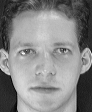

In [15]:
tf.keras.preprocessing.image.array_to_img(trainX[0])

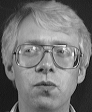

In [16]:
tf.keras.preprocessing.image.array_to_img(trainX[20])

# build the model

In [17]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((112,92,1), input_shape=(112,92,1)))
#normalize the inputs
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, #No of filters
                                 kernel_size=(3,3),
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))

[2021-11-28 16:23:05.677 tensorflow-2-3-gpu-py-ml-t3-medium-e8c155733600f57acc66941bd944:25 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-28 16:23:05.718 tensorflow-2-3-gpu-py-ml-t3-medium-e8c155733600f57acc66941bd944:25 INFO profiler_config_parser.py:102] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


In [18]:
# Flatten the extracted features in a single dimension

In [19]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(20, activation='softmax'))

In [20]:
# set optimizer and loss

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 112, 92, 1)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 92, 1)        4         
_________________________________________________________________
conv2d (Conv2D)              (None, 110, 90, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 45, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 55, 45, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 21, 64)        0

In [22]:
model.compile(optimizer='adam', 
             loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the model

In [23]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=16)

Epoch 1/30
15/15 [==============================] - 4s 256ms/step - loss: 3.2759 - accuracy: 0.0250 - val_loss: 2.9955 - val_accuracy: 0.0500
Epoch 2/30
15/15 [==============================] - 4s 243ms/step - loss: 2.7798 - accuracy: 0.1458 - val_loss: 2.9831 - val_accuracy: 0.0500
Epoch 3/30
15/15 [==============================] - 4s 236ms/step - loss: 1.5034 - accuracy: 0.5625 - val_loss: 3.2615 - val_accuracy: 0.0500
Epoch 4/30
15/15 [==============================] - 4s 234ms/step - loss: 0.4920 - accuracy: 0.8542 - val_loss: 7.2672 - val_accuracy: 0.0500
Epoch 5/30
15/15 [==============================] - 3s 226ms/step - loss: 0.2513 - accuracy: 0.9000 - val_loss: 7.9652 - val_accuracy: 0.0500
Epoch 6/30
15/15 [==============================] - 4s 244ms/step - loss: 0.1984 - accuracy: 0.9542 - val_loss: 3.9822 - val_accuracy: 0.1000
Epoch 7/30
15/15 [==============================] - 4s 236ms/step - loss: 0.1018 - accuracy: 0.9667 - val_loss: 1.9685 - val_accuracy: 0.3750
Epoch 

In [24]:
#  Lets use Transfer learning using ResNet50

In [25]:
# prepare data to have 3 channels

In [26]:
trainX = np.load("trainX.npy", allow_pickle='TRUE')
trainY = np.load("trainY.npy", allow_pickle='TRUE')
testX = np.load("testX.npy", allow_pickle='TRUE')
testY = np.load("testY.npy", allow_pickle='TRUE')
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(240, 10304)
(240,)
(160, 10304)
(160,)


In [27]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=20)
testY = tf.keras.utils.to_categorical(testY, num_classes=20)

In [28]:
trainX= trainX.reshape(240,112,92)
testX = testX.reshape(160,112,92)

In [29]:
trainX = np.repeat(trainX[...,np.newaxis],3,-1)
testX = np.repeat(testX[...,np.newaxis],3,-1)

In [30]:
trainX.shape

(240, 112, 92, 3)

# Create resnet model and download pretrained weights

In [31]:
model = tf.keras.applications.resnet50.ResNet50(include_top=False, #we will make our own FC layer
                                                input_shape=(112,92,3),
                                                weights='imagenet')

94773248/94765736 [==============================] - 1s 0us/step


In [32]:
#Set the base layers to not trainable and we will add our own layers
for layer in model.layers:
    layer.trainable = False

In [33]:
model.output

<tf.Tensor 'conv5_block3_out/Relu:0' shape=(None, 4, 3, 2048) dtype=float32>

# Add FC layer for our classes

In [34]:

#lets get the output tensor
x = model.output
#Flatten the output in single dim
x = tf.keras.layers.Flatten()(x)
#Add one intermediate dense layer
x = tf.keras.layers.Dense(200, activation='relu')(x)
#Lets the add the final classification layer(20 modes)
prediction = tf.keras.layers.Dense(20, activation='softmax')(x)

# Build the final model


In [35]:
final_model = tf.keras.models.Model(inputs=model.input,
                                    outputs=prediction)

In [36]:
final_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 112, 92, 3)] 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 118, 98, 3)   0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 56, 46, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 56, 46, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

# Run the Training

In [37]:
trainX = trainX.reshape(240,112,92,3)
testX = testX.reshape(160,112,92,3)

In [38]:
final_model.compile(optimizer='adam',
             loss ='categorical_crossentropy', metrics=['accuracy'])

In [39]:
final_model.fit(trainX, trainY, validation_data=(testX,testY), epochs=20, batch_size =16)

Epoch 1/20
15/15 [==============================] - 9s 586ms/step - loss: 7.0180 - accuracy: 0.4875 - val_loss: 1.5382 - val_accuracy: 0.7563
Epoch 2/20
15/15 [==============================] - 8s 519ms/step - loss: 0.2959 - accuracy: 0.9250 - val_loss: 0.2988 - val_accuracy: 0.9375
Epoch 3/20
15/15 [==============================] - 8s 553ms/step - loss: 0.0376 - accuracy: 0.9875 - val_loss: 0.3552 - val_accuracy: 0.9250
Epoch 4/20
15/15 [==============================] - 8s 519ms/step - loss: 0.0062 - accuracy: 0.9958 - val_loss: 0.3330 - val_accuracy: 0.9438
Epoch 5/20
15/15 [==============================] - 8s 523ms/step - loss: 2.2444e-04 - accuracy: 1.0000 - val_loss: 0.2562 - val_accuracy: 0.9688
Epoch 6/20
15/15 [==============================] - 8s 529ms/step - loss: 8.8349e-05 - accuracy: 1.0000 - val_loss: 0.2440 - val_accuracy: 0.9688
Epoch 7/20
15/15 [==============================] - 8s 534ms/step - loss: 7.7398e-05 - accuracy: 1.0000 - val_loss: 0.2402 - val_accuracy: 0

In [40]:
# LR reduction on plateuing for pushing the accuracy further

In [41]:
final_prediction = final_model.predict(testX)


In [42]:
final_prediction.shape

(160, 20)

In [47]:
print('No of misclassifications: ',((final_prediction.argmax(axis=1))!= testY.argmax(axis=1)).sum())


No of misclassifications:  3


In [48]:
final_prediction.argmax(axis=1)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4, 17,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  7,  9,  9,  9,  7, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 19, 19])

In [49]:
testY.argmax(axis=1)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 19, 19])

In [51]:
# LR reduction on plateuing for pushing the accuracy further